<h1>Analyze the Federal Aviation Authority (FAA) dataset using Pandas to do the following:<h1>

  <h3>1.View
  <ul><li>aircraft make name</li>
  <li>state name</li>
  <li>aircraft model name</li>
  <li>text information</li>
  <li>flight phase</li>
  <li>event description type</li>
  <li>fatal flag</li><ul>
      
2.Clean the dataset and replace the fatal flag NaN with “No”.
      
3.Find the aircraft types and their occurrences in the dataset.
      
4.Remove all the observations where aircraft names are not available.
      
5.Display the observations where fatal flag is “Yes”.<h3>

In [2]:
import pandas as pd
import numpy as np
df_faa=pd.read_csv('D:\\PG_DSBA_Business_Analytics_\\Data science with Python\\Assignments\\Federal Aviation Authority\\faa_ai_prelim.csv')
print(df_faa.columns)
import missingno

Index(['UPDATED', 'ENTRY_DATE', 'EVENT_LCL_DATE', 'EVENT_LCL_TIME',
       'LOC_CITY_NAME', 'LOC_STATE_NAME', 'LOC_CNTRY_NAME', 'RMK_TEXT',
       'EVENT_TYPE_DESC', 'FSDO_DESC', 'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR',
       'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG',
       'ACFT_DMG_DESC', 'FLT_ACTIVITY', 'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL',
       'FATAL_FLAG', 'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR',
       'FLT_CRW_INJ_SERIOUS', 'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK',
       'CBN_CRW_INJ_NONE', 'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS',
       'CBN_CRW_INJ_FATAL', 'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR',
       'PAX_INJ_SERIOUS', 'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE',
       'GRND_INJ_MINOR', 'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK'],
      dtype='object')


<AxesSubplot:>

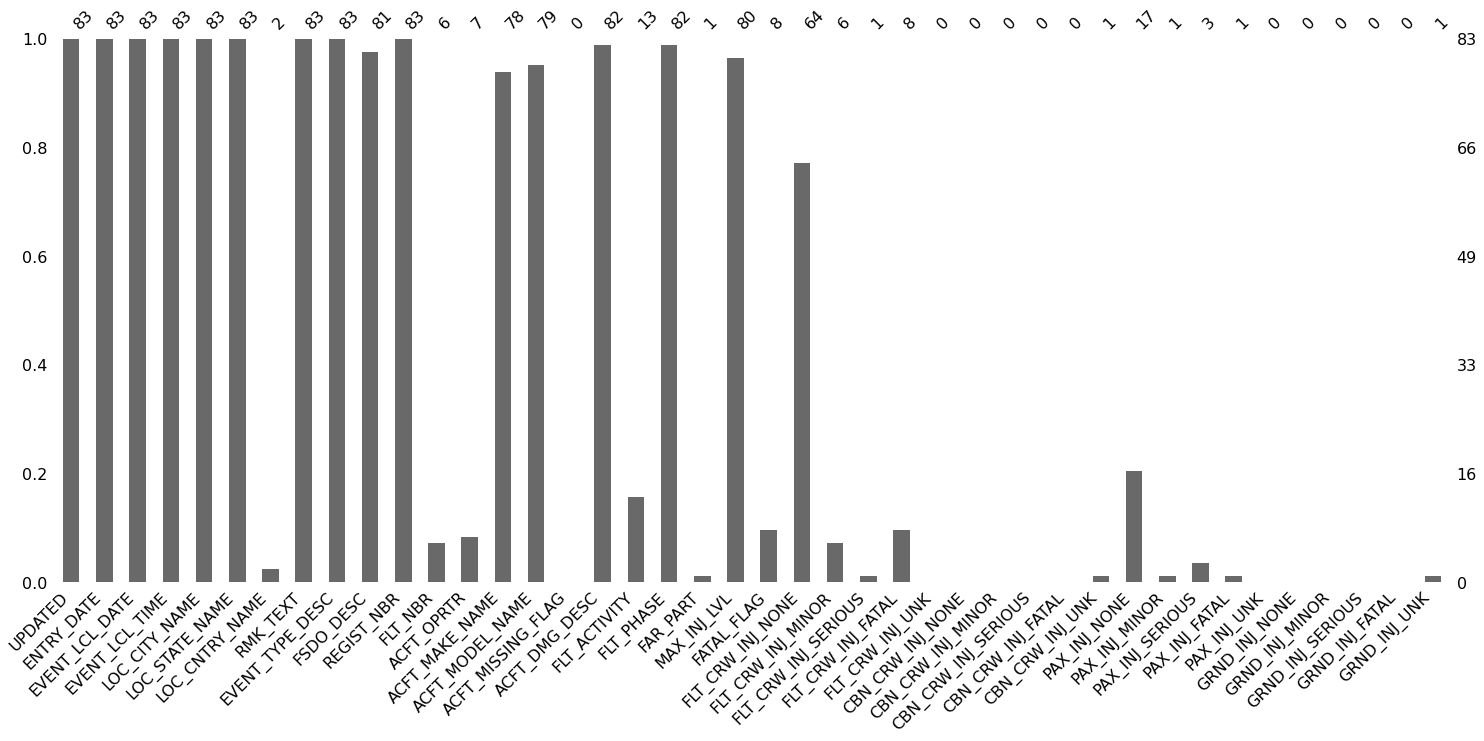

In [9]:
missingno.bar(df_faa)

In [3]:
#reshape according to required fields
df_mod=df_faa[['ACFT_MAKE_NAME', 'LOC_STATE_NAME', 'ACFT_MODEL_NAME', 'RMK_TEXT', 'FLT_PHASE', 'EVENT_TYPE_DESC', 'FATAL_FLAG']]

In [ ]:
#fill 'No' in placce of NAN values in fatal_flag
df_mod['FATAL_FLAG'].fillna(value='No',inplace=True)

In [4]:
#drop entries with blank aircraft make values
df_cleaned=df_mod.dropna(subset=['ACFT_MAKE_NAME'])

In [8]:
df_cleaned

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,NaN
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,NaN
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN
...,...,...,...,...,...,...,...
78,AERONCA,Texas,O58B,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",LANDING (LDG),Accident,NaN
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes


In [9]:
#find occurences of each aircraft make and fatal flag
df_ac_make=df_cleaned.groupby('ACFT_MAKE_NAME')
df_fatal_accident=df_cleaned.groupby('FATAL_FLAG')

In [10]:
df_ac_make.size()

ACFT_MAKE_NAME
AERO COMMANDER             1
AERONCA                    1
AEROSTAR INTERNATIONAL     1
AIRBUS                     1
BEECH                      9
BELL                       2
BOEING                     3
CESSNA                    23
CHAMPION                   2
CHRISTEN                   1
CONSOLIDATED VULTEE        1
EMBRAER                    1
ENSTROM                    1
FAIRCHILD                  1
FLIGHT DESIGN              1
GLOBE                      1
GREAT LAKES                1
GRUMMAN                    1
GULFSTREAM                 1
HUGHES                     1
LANCAIR                    2
MAULE                      1
MOONEY                     4
NORTH AMERICAN             1
PIPER                     10
PITTS                      1
SAAB                       1
SABRELINER                 1
SOCATA                     2
VANS                       1
dtype: int64

In [11]:
df_fatal_accident.size()

FATAL_FLAG
Yes    7
dtype: int64

In [12]:
#select fatal entries
fatal_entries=df_fatal_accident.get_group('Yes')

In [13]:
fatal_entries

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes
53,PIPER,Florida,PA28,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,UNKNOWN (UNK),Accident,Yes
55,FLIGHT DESIGN,California,CTLS,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,UNKNOWN (UNK),Accident,Yes
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
82,CESSNA,Alabama,182,N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...,UNKNOWN (UNK),Accident,Yes
